In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

"""
Generative Adversarial Network: 
 - generator model maps points in the latent space to points in image space
 - discriminator model classifies real images from the training set from fake images output from the generator network

latent space is the encoded lower dimensional representation that captures the the meaningful features of observed data

training:
    - sample batch of random points in the latent space
    - generator use the random points to generate an output
    - the discriminator classify the output as real or fake
"""

# discriminator to classify fake vs real
discriminator = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(64, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.GlobalMaxPooling2D(),
        layers.Dense(1),
    ],
    name="discriminator",
)

latent_dim = 128

generator = keras.Sequential(
    [
        keras.Input(shape=(latent_dim,)),
        # We want to generate 128 coefficients to reshape into a 7x7x128 map
        layers.Dense(7 * 7 * 128),
        layers.LeakyReLU(alpha=0.2),
        layers.Reshape((7, 7, 128)),
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(1, (7, 7), padding="same", activation="sigmoid"),
    ],
    name="generator",
)

d_optimizer = keras.optimizers.Adam(learning_rate=0.0003) # optimiser for discriminator
g_optimizer = keras.optimizers.Adam(learning_rate=0.0004) # optimiser for generator

loss_fn = keras.losses.BinaryCrossentropy(from_logits=True)

# compares the discriminator's classifications on real images and classifications on fake images
def discriminator_loss(real_output, fake_output):
    real_loss = loss_fn(tf.ones_like(real_output), real_output)
    fake_loss = loss_fn(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

# how well the generator produce fake images to trick the discriminator
# compare the discriminator's classifications on fake images to an array of 1s
def generator_loss(fake_output):
    return loss_fn(tf.ones_like(fake_output), fake_output)

# training loop
# the annotation causes the function to be compiled
@tf.function 
def train_step(images):
    random_latent_vectors = tf.random.normal(shape=(batch_size, latent_dim)) # Sample random points in the latent space
    
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:    
        generated_images = generator(random_latent_vectors, training=True)  # Decode random points to fake images
        
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)
        
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
    
    
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    
    # apply gradient update to the weights
    g_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    d_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    return disc_loss, gen_loss, generated_images
    
# Prepare the dataset. We use both the training & test MNIST digits.
BATCH_SIZE = 64
noise_dim = 100
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
all_digits = np.concatenate([x_train, x_test])
all_digits = all_digits.astype("float32") / 255.0
all_digits = np.reshape(all_digits, (-1, 28, 28, 1))
dataset = tf.data.Dataset.from_tensor_slices(all_digits)
dataset = dataset.shuffle(buffer_size=1024).batch(BATCH_SIZE)



Start epoch 0
discriminator loss at step 0: 1.34
adversarial loss at step 0: 0.90


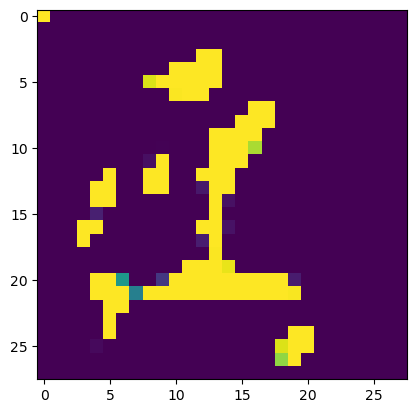

discriminator loss at step 200: 1.07
adversarial loss at step 200: 1.21


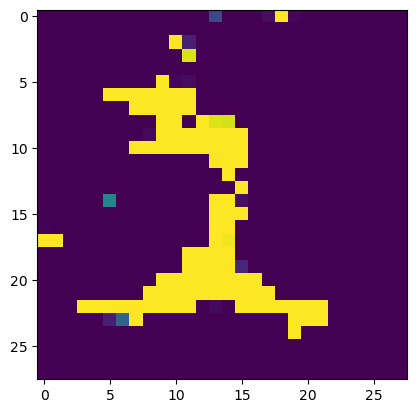

discriminator loss at step 400: 0.44
adversarial loss at step 400: 1.82


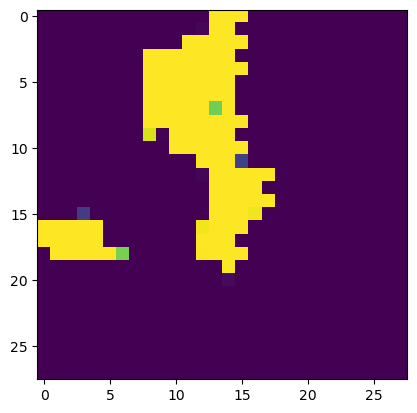

discriminator loss at step 600: 0.34
adversarial loss at step 600: 2.79


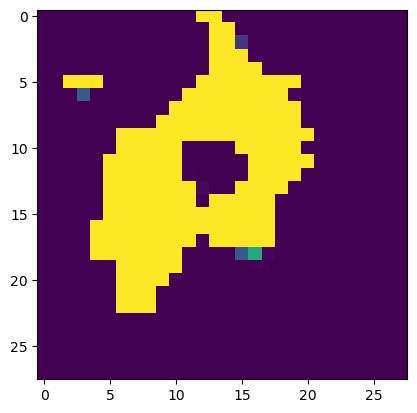

discriminator loss at step 800: 0.26
adversarial loss at step 800: 2.45


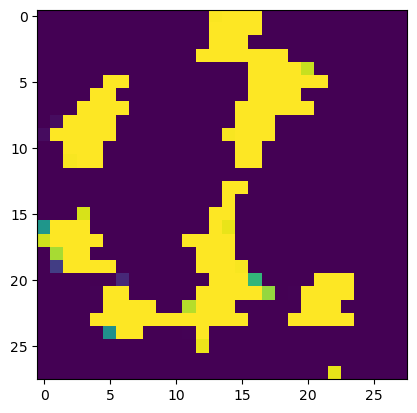

discriminator loss at step 1000: 0.21
adversarial loss at step 1000: 2.48


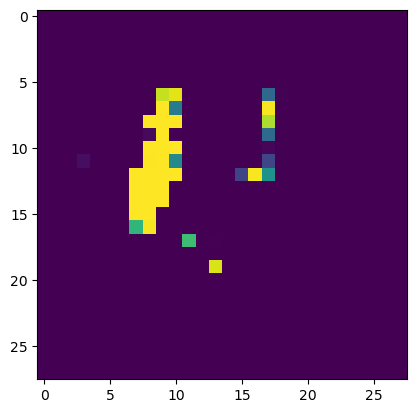


Start epoch 1
discriminator loss at step 0: 0.64
adversarial loss at step 0: 1.85


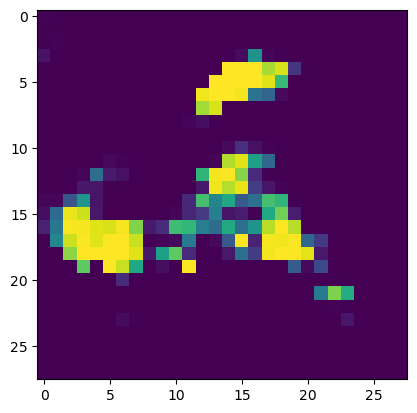

discriminator loss at step 200: 1.16
adversarial loss at step 200: 0.87


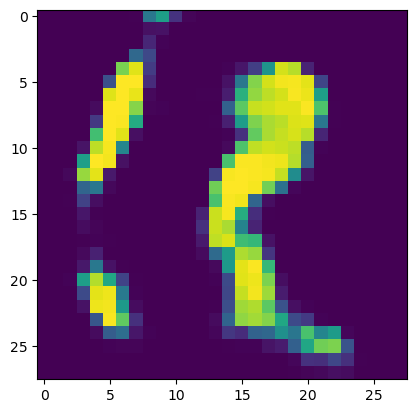

discriminator loss at step 400: 1.13
adversarial loss at step 400: 1.13


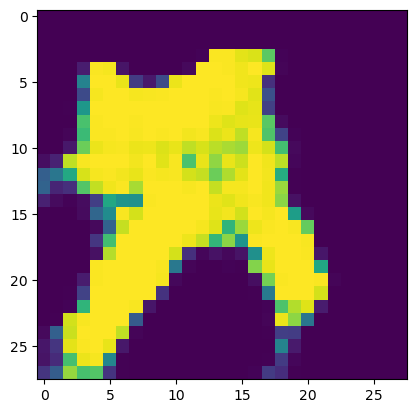

discriminator loss at step 600: 1.26
adversarial loss at step 600: 0.86


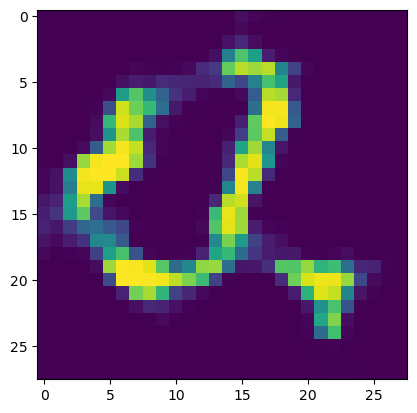

discriminator loss at step 800: 1.37
adversarial loss at step 800: 0.80


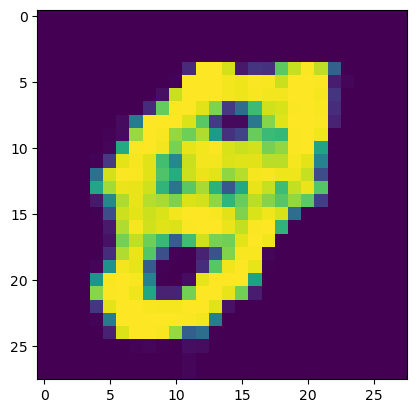

discriminator loss at step 1000: 1.56
adversarial loss at step 1000: 0.77


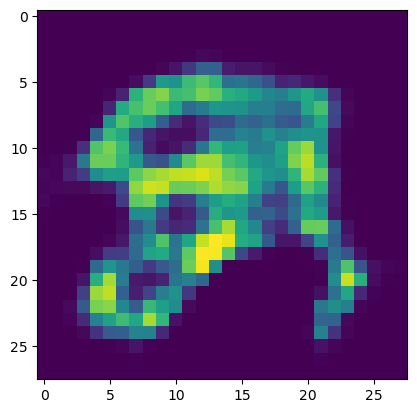


Start epoch 2
discriminator loss at step 0: 1.26
adversarial loss at step 0: 0.68


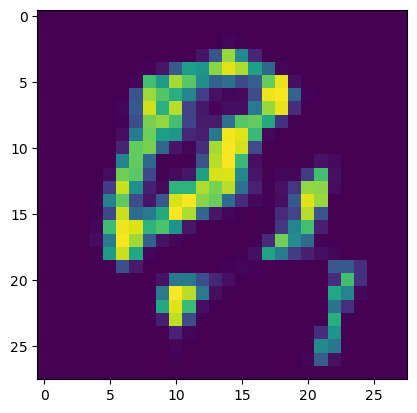

discriminator loss at step 200: 1.21
adversarial loss at step 200: 0.82


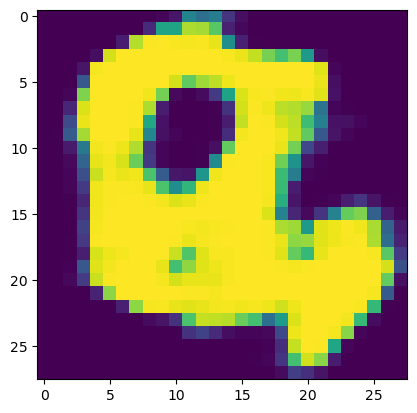

discriminator loss at step 400: 1.55
adversarial loss at step 400: 0.50


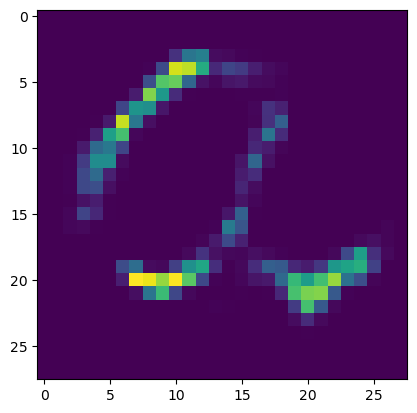

discriminator loss at step 600: 1.37
adversarial loss at step 600: 0.70


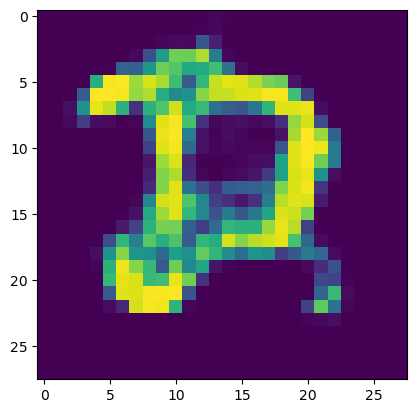

discriminator loss at step 800: 1.46
adversarial loss at step 800: 0.74


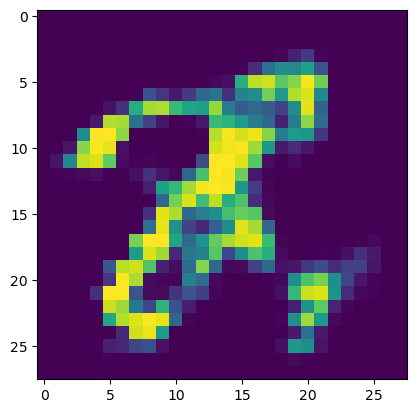

discriminator loss at step 1000: 1.46
adversarial loss at step 1000: 0.70


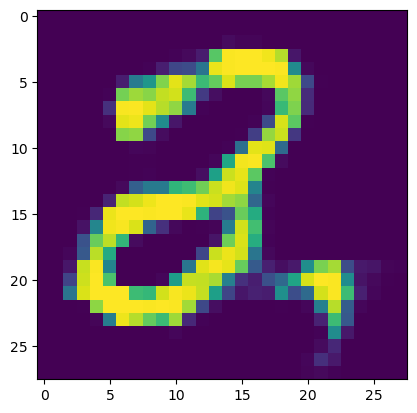


Start epoch 3
discriminator loss at step 0: 1.42
adversarial loss at step 0: 0.57


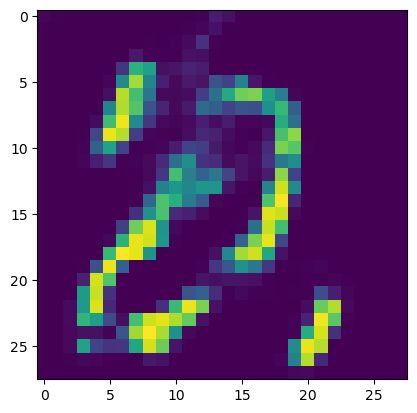

discriminator loss at step 200: 1.41
adversarial loss at step 200: 0.70


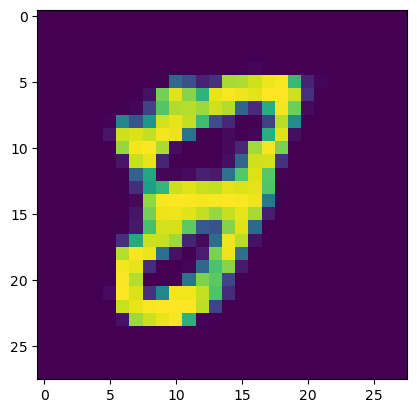

discriminator loss at step 400: 1.38
adversarial loss at step 400: 0.68


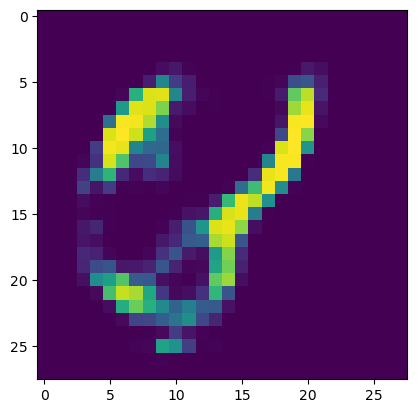

discriminator loss at step 600: 1.13
adversarial loss at step 600: 0.79


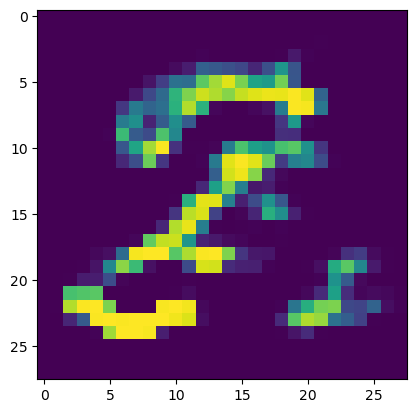

discriminator loss at step 800: 1.26
adversarial loss at step 800: 0.90


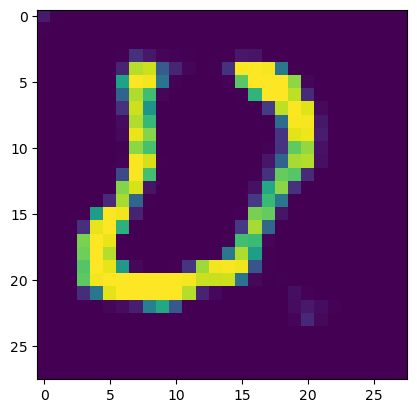

discriminator loss at step 1000: 1.33
adversarial loss at step 1000: 0.72


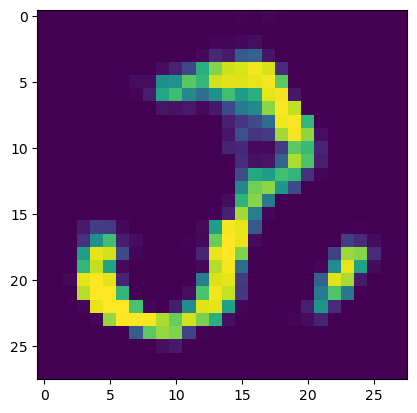


Start epoch 4
discriminator loss at step 0: 1.38
adversarial loss at step 0: 0.74


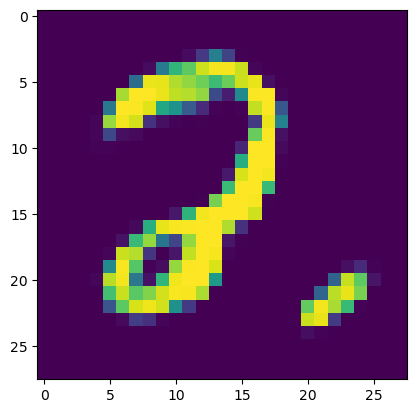

discriminator loss at step 200: 1.39
adversarial loss at step 200: 0.79


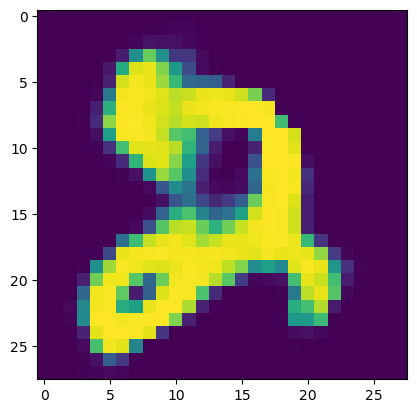

discriminator loss at step 400: 1.46
adversarial loss at step 400: 0.73


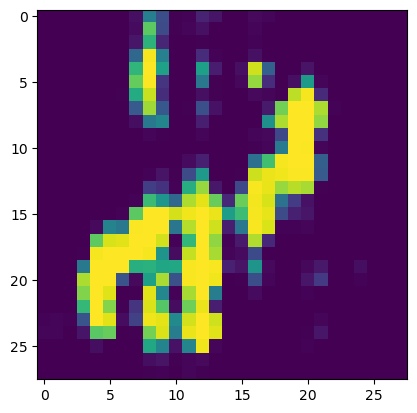

discriminator loss at step 600: 1.27
adversarial loss at step 600: 1.05


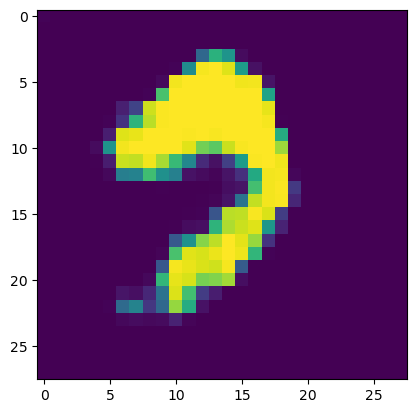

discriminator loss at step 800: 1.17
adversarial loss at step 800: 0.99


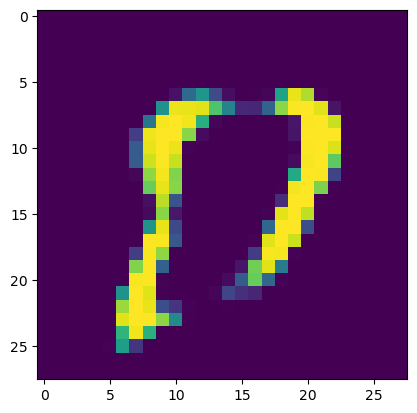

discriminator loss at step 1000: 1.42
adversarial loss at step 1000: 0.67


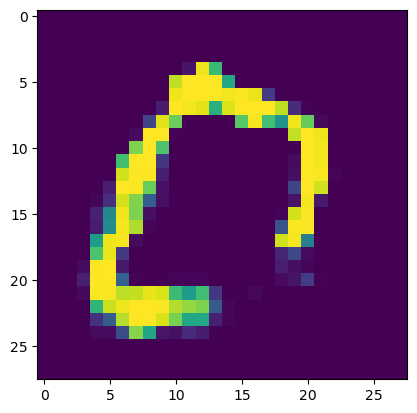


Start epoch 5
discriminator loss at step 0: 1.40
adversarial loss at step 0: 0.70


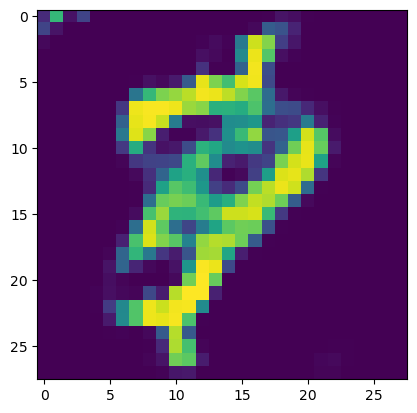

discriminator loss at step 200: 1.65
adversarial loss at step 200: 0.54


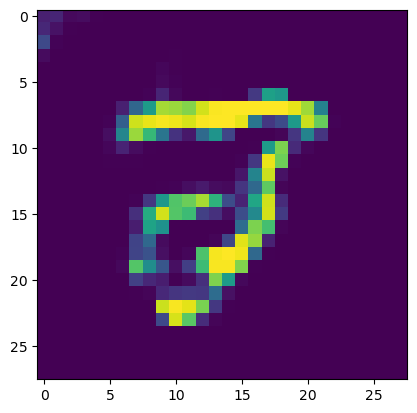

discriminator loss at step 400: 1.14
adversarial loss at step 400: 0.88


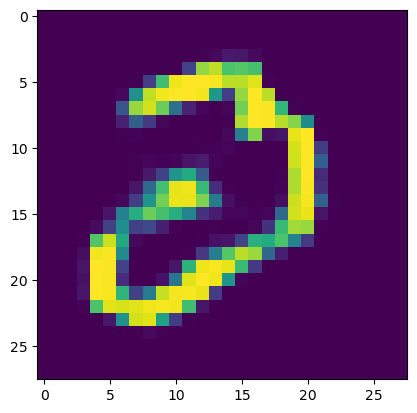

discriminator loss at step 600: 1.50
adversarial loss at step 600: 0.68


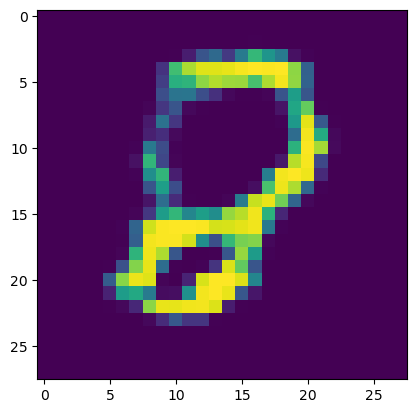

discriminator loss at step 800: 1.60
adversarial loss at step 800: 0.57


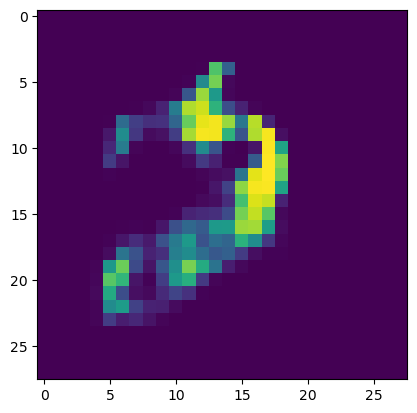

discriminator loss at step 1000: 1.10
adversarial loss at step 1000: 0.97


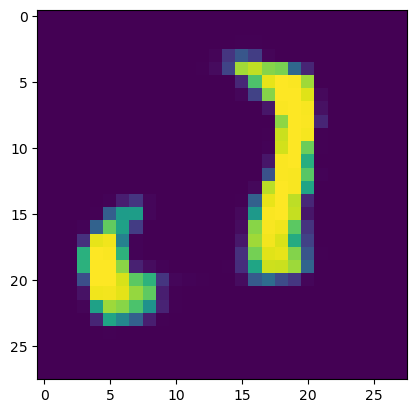


Start epoch 6
discriminator loss at step 0: 1.08
adversarial loss at step 0: 0.96


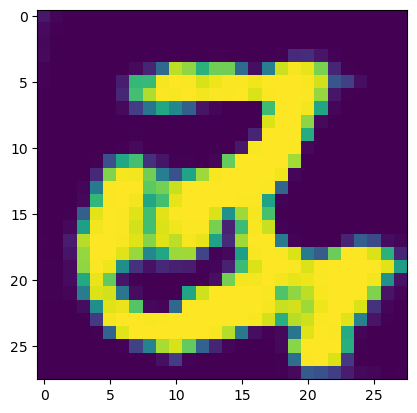

discriminator loss at step 200: 1.12
adversarial loss at step 200: 0.87


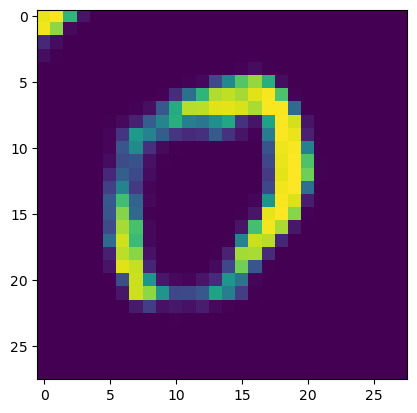

discriminator loss at step 400: 1.33
adversarial loss at step 400: 0.93


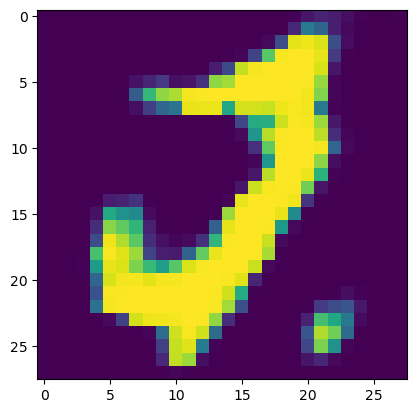

discriminator loss at step 600: 1.23
adversarial loss at step 600: 0.80


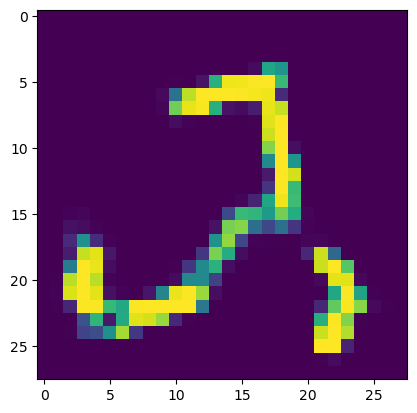

discriminator loss at step 800: 1.25
adversarial loss at step 800: 0.96


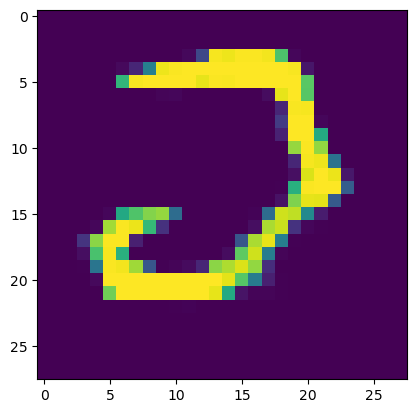

discriminator loss at step 1000: 1.09
adversarial loss at step 1000: 0.92


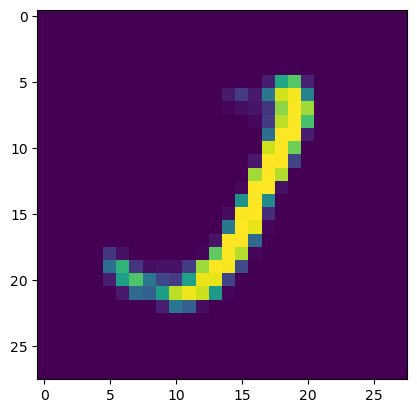


Start epoch 7
discriminator loss at step 0: 1.19
adversarial loss at step 0: 0.90


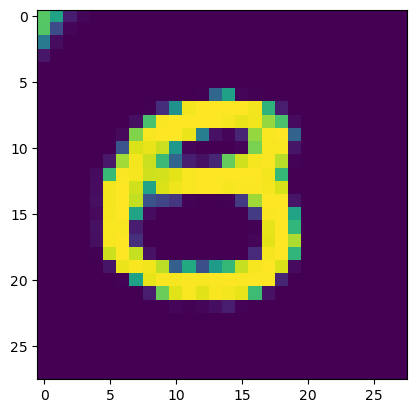

discriminator loss at step 200: 1.21
adversarial loss at step 200: 0.84


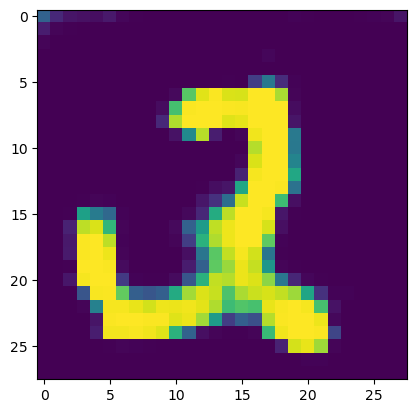

discriminator loss at step 400: 1.19
adversarial loss at step 400: 0.84


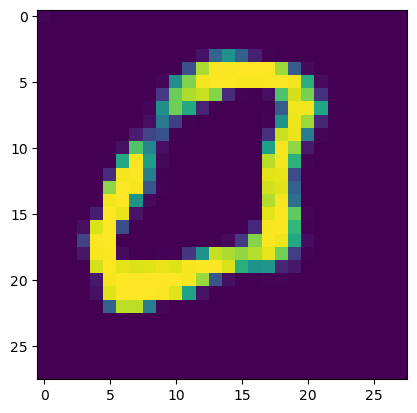

discriminator loss at step 600: 1.07
adversarial loss at step 600: 1.03


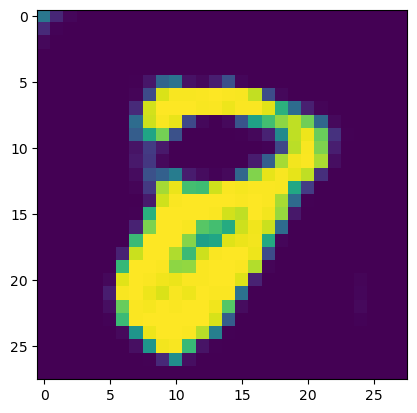

discriminator loss at step 800: 1.27
adversarial loss at step 800: 0.80


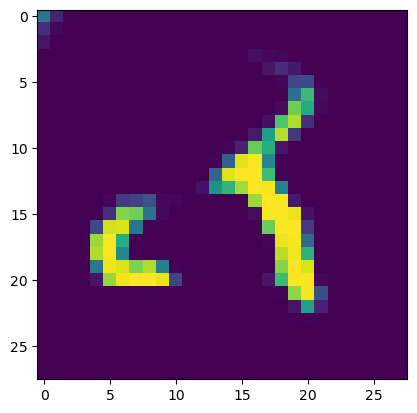

discriminator loss at step 1000: 1.09
adversarial loss at step 1000: 1.04


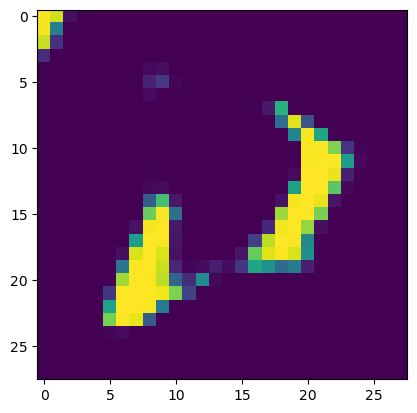


Start epoch 8
discriminator loss at step 0: 1.27
adversarial loss at step 0: 0.88


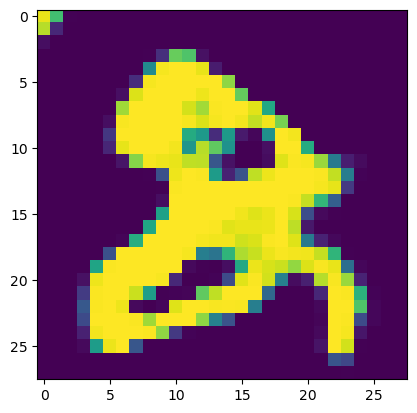

discriminator loss at step 200: 1.30
adversarial loss at step 200: 0.82


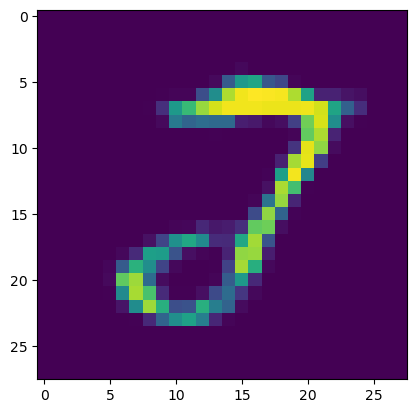

discriminator loss at step 400: 1.27
adversarial loss at step 400: 0.82


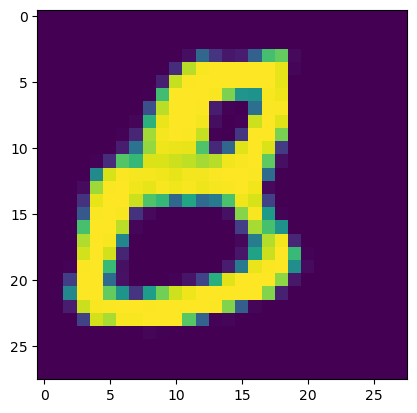

discriminator loss at step 600: 1.29
adversarial loss at step 600: 0.75


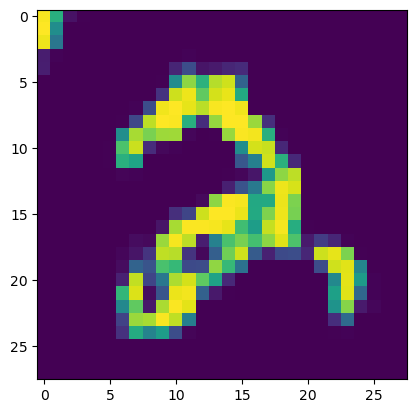

discriminator loss at step 800: 1.19
adversarial loss at step 800: 1.04


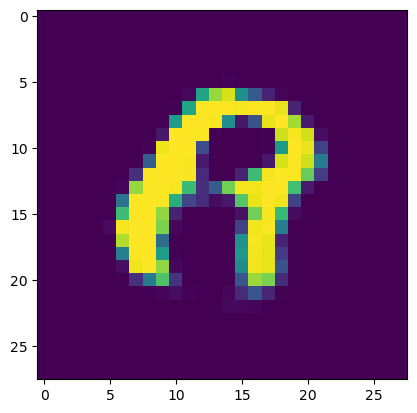

discriminator loss at step 1000: 1.29
adversarial loss at step 1000: 0.84


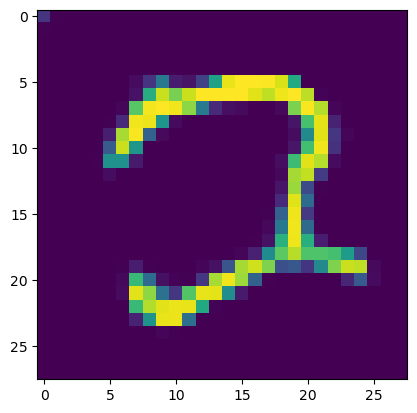


Start epoch 9
discriminator loss at step 0: 1.12
adversarial loss at step 0: 0.93


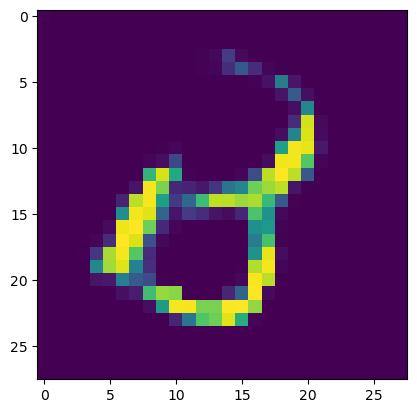

discriminator loss at step 200: 1.22
adversarial loss at step 200: 0.85


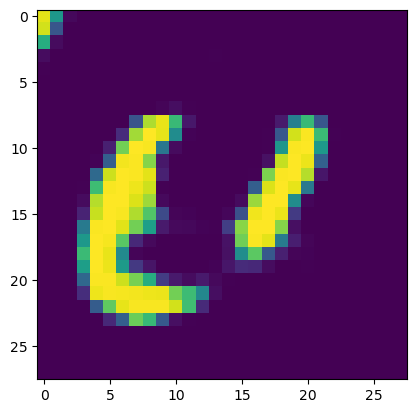

discriminator loss at step 400: 0.90
adversarial loss at step 400: 1.22


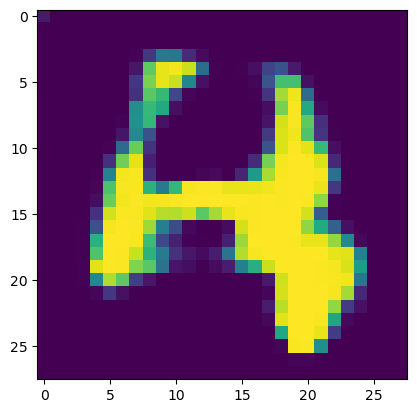

discriminator loss at step 600: 1.11
adversarial loss at step 600: 1.00


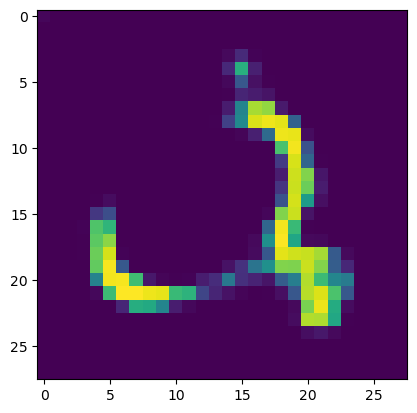

discriminator loss at step 800: 1.17
adversarial loss at step 800: 0.92


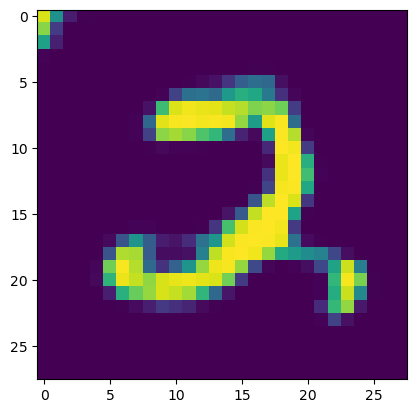

discriminator loss at step 1000: 1.06
adversarial loss at step 1000: 0.97


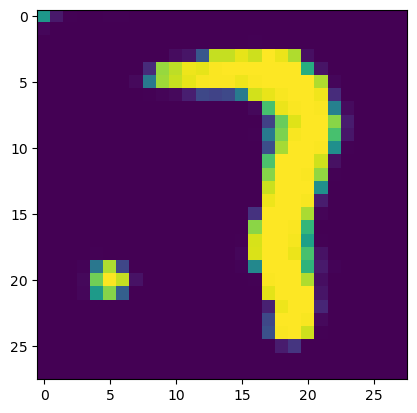

In [ ]:
epochs = 10

for epoch in range(epochs):
    print("\nStart epoch", epoch)

    for step, real_images in enumerate(dataset):
        # Train the discriminator & generator on one batch of real images.
        d_loss, g_loss, generated_images = train_step(real_images)

        # Logging.
        if step % 200 == 0:
            print("discriminator loss at step %d: %.2f" % (step, d_loss))
            print("adversarial loss at step %d: %.2f" % (step, g_loss))
            
            plt.imshow(generated_images[0] * 255.0, interpolation='nearest')
            plt.show()